# Kickstarter projects

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix

### 目的変数と説明変数の関係を確認するためのグラフを作成する（ここからはNotebook上の作業です）

In [2]:
 df_ksproject= pd.read_csv("./ks-projects-201801.csv")

In [5]:
display(df_ksproject.head())
df_ksproject.describe()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


### 前処理

In [13]:
#１個でも欠損値がある行はとりあえず削除してみる。
df_ks18_dnan = df_ksproject.dropna(how='any')
display(df_ks18_dnan.isnull().sum())

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [14]:
df_ks18_dnan['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [15]:
# 成功だけを抽出したDFと失敗だけを抽出したDF
df_ks18_success = df_ks18_dnan[df_ks18_dnan['state']=='successful']
df_ks18_failed =  df_ks18_dnan[df_ks18_dnan['state']=='failed']
#両方を結合
df_ks18_sf = pd.concat([df_ks18_success,df_ks18_failed])
#stateの要素の個数を数えてみる。
df_ks18_sf['state'].value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

In [18]:
df_ks18_sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 5 to 378660
Data columns (total 15 columns):
ID                  331462 non-null int64
name                331462 non-null object
category            331462 non-null object
main_category       331462 non-null object
currency            331462 non-null object
deadline            331462 non-null object
goal                331462 non-null float64
launched            331462 non-null object
pledged             331462 non-null float64
state               331462 non-null object
backers             331462 non-null int64
country             331462 non-null object
usd pledged         331462 non-null float64
usd_pledged_real    331462 non-null float64
usd_goal_real       331462 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 40.5+ MB


In [19]:
#LabelEncoderのインスタンスを生成
le = LabelEncoder()

#categoryに出てくるカテゴリを覚えて
#categoryを数値に変換
le = le.fit(df_ks18_sf['category'])
df_ks18_sf['category'] = le.transform(df_ks18_sf['category'])

#main_categoryに出てくるカテゴリを覚えて
#main_categoryを数値に変換
le = le.fit(df_ks18_sf['main_category'])
df_ks18_sf['main_category'] = le.transform(df_ks18_sf['main_category'])

#currencyに出てくるカテゴリを覚えて
#currencyを数値に変換
le = le.fit(df_ks18_sf['currency'])
df_ks18_sf['currency'] = le.transform(df_ks18_sf['currency'])

#stateに出てくるカテゴリを覚えて
#stateを数値に変換
le = le.fit(df_ks18_sf['state'])
df_ks18_sf['state'] = le.transform(df_ks18_sf['state'])

#countryに出てくるカテゴリを覚えて
#countryを数値に変換
le = le.fit(df_ks18_sf['country'])
df_ks18_sf['country'] = le.transform(df_ks18_sf['country'])

df_ks18_sf.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,123,7,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,21,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,58,7,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,1,16,21,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,72,10,13,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,1,100,21,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,136,8,5,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,1,761,9,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,90,10,13,2012-08-17,250.0,2012-08-02 14:11:32,250.0,1,7,21,250.00,250.00,250.00


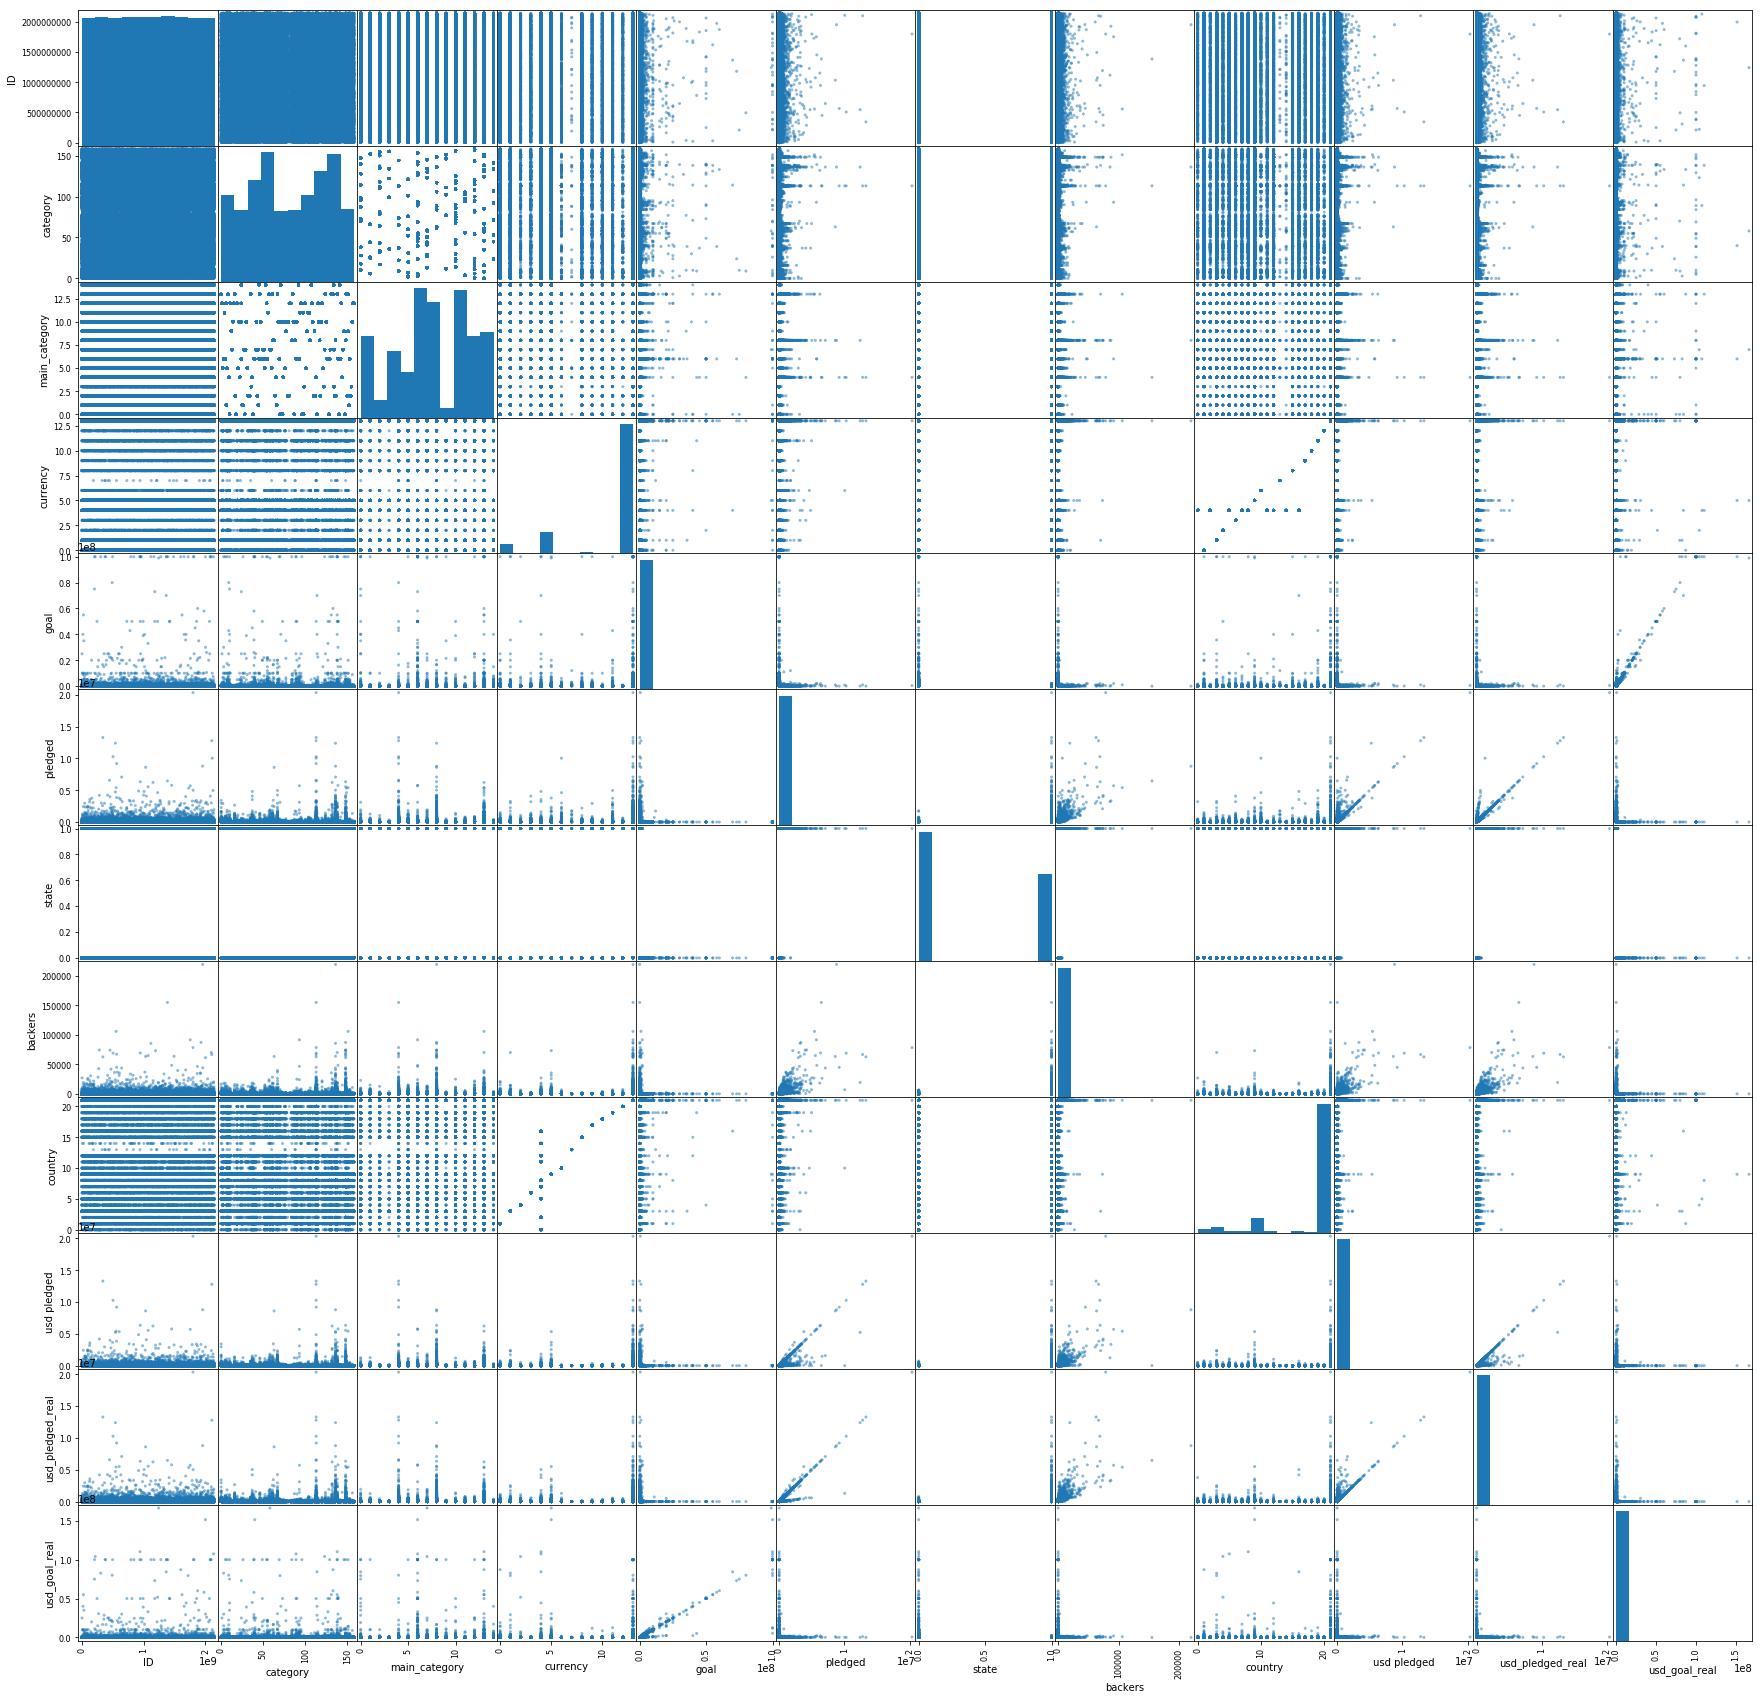

In [20]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_ks18_sf, figsize=(30,30))
plt.show()

散布図行列から「state」と相関がありそうなのは、「goal、pledged、backers、usd pledged、usd_pledged_real、usd_goal_real」だが、「pledged、usd pledged、usd_pledged_real」は、結果として得られる数値なので、予測には使えません。

実質、「goal、backers、usd_goal_real」の３つが予測には使えると判断し、さらなる分析を実施する。

#### 「goal」と「usd_goal_real」の関係を見てみる。


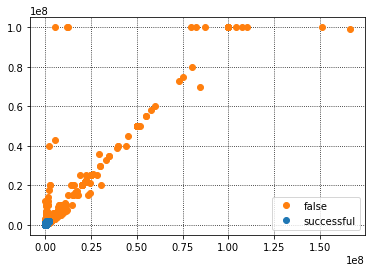

In [21]:
#成功と、失敗でデータを分ける。
df_ks18_s = df_ks18_sf[df_ks18_sf['state']==1]
df_ks18_f = df_ks18_sf[df_ks18_sf['state']==0]

#それぞれをプロットしてみる
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_ks18_s["usd_goal_real"], df_ks18_s["goal"], 'o', color='C0', label='successful')
plt.plot(df_ks18_f["usd_goal_real"], df_ks18_f["goal"], 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show()

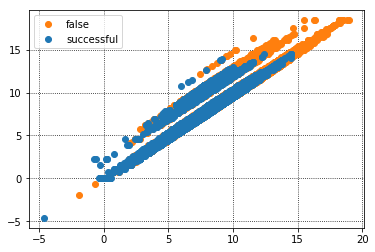

In [25]:
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_ks18_s["usd_goal_real"]), np.log(df_ks18_s["goal"]), 'o', color='C0', label='successful')
plt.plot(np.log(df_ks18_f["usd_goal_real"]), np.log(df_ks18_f["goal"]), 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show()

#### 「goal」と「backers」の関係を見てみる

<function matplotlib.pyplot.show(*args, **kw)>

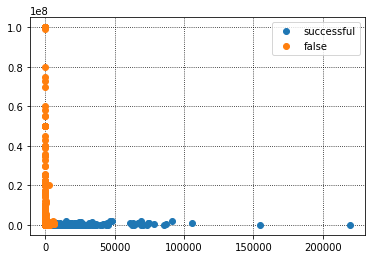

In [26]:
#それぞれをプロットしてみる
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(df_ks18_s["backers"], df_ks18_s["goal"], 'o', color='C0', label='successful')
plt.plot(df_ks18_f["backers"], df_ks18_f["goal"], 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show

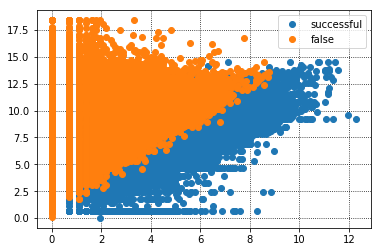

In [27]:
# Log(0)対策
delta=1

#「goal」、「backers」の対数の関係を見てみる。
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(np.log(df_ks18_s["backers"]+delta), np.log(df_ks18_s["goal"]+delta), 'o', color='C0', label='successful')
plt.plot(np.log(df_ks18_f["backers"]+delta), np.log(df_ks18_f["goal"]+delta), 'o', color='C1', label='false')
plt.legend(loc='best')
plt.show()

ここまでの関係の調査から、目的変数「state」を'successful'と'false'に分類するためには、説明変数として「goal」と「backers」が使えそうだということがわかった。

#### 外れ値

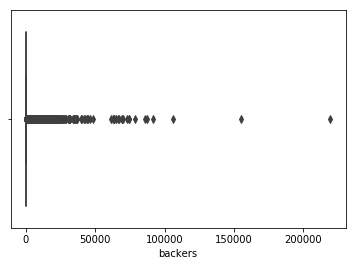

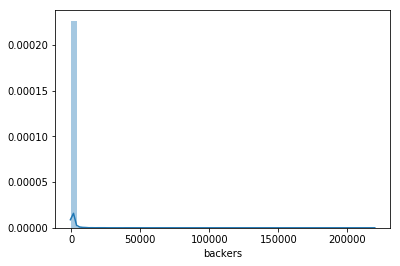

In [30]:
sns.boxplot(df_ks18_s["backers"])
plt.show()
sns.distplot(df_ks18_s["backers"])
plt.show()

### 分類モデル作成

#### ロジスティック回帰で分類

In [ ]:
#目的変数'state'を正解としてyに格納
y = df_ks18_sf['state'].values
#説明変数'goal','backers'を入力としてXに格納
X = df_ks18_sf[['goal', 'backers']].values

#ロジスティック回帰で学習
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234 )
clf.fit(X, y)

# 標準化処理
#std_scaler = StandardScaler() 
# fit_transform関数で標準化した特徴量X_scaledを得る
# 以降はX_scaledをモデルの学習等に使う
#X_scaled = std_scaler.fit_transform(X)

# clf.fit(X_scaled, y)

/usr/local/var/pyenv/versions/anaconda3-5.3.1/envs/skillupai/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


識別精度を確認してみる。

In [ ]:
# 学習した結果を使って説明変数を入力して予測
y_est = clf.predict(X)

#混同行列を作成
conf_mat = pd.DataFrame(confusion_matrix(y, y_est))
display(conf_mat)
tn, fp, fn, tp = confusion_matrix(y, y_est).ravel()
print(fn, fp)
print(tn, tp)

#'Accuracy、Recall、Precisionを求めて表示
print('Accuracy  = {:.3f}%'.format(100 * (tn+tp)/(tn+fp+fn+tp)))
print('Recall    = {:.3f}%'.format(100 * (tp)/(fn+tp)))
print('Precision = {:.3f}%'.format(100 * (tp)/(fp+tp))) 